In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
import matplotlib.patches as mp
import math as math

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


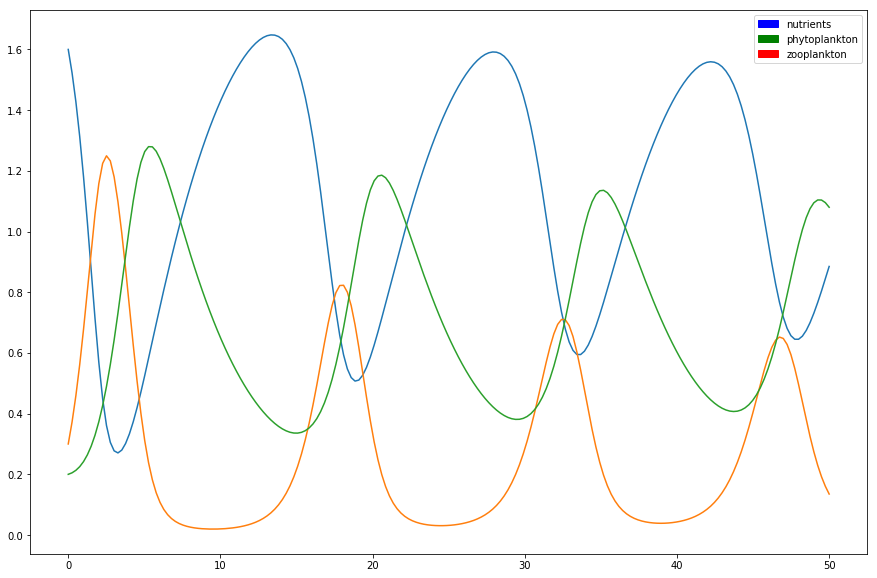

[[1.6        0.3        0.2       ]
 [1.52245427 0.37251846 0.20502727]
 [1.42718741 0.45957456 0.21323804]
 [1.31292104 0.56178748 0.22529148]
 [1.17987925 0.67815274 0.24196801]
 [1.03080802 0.80503654 0.26415544]
 [0.87199516 0.93519375 0.29281109]
 [0.71364075 1.05746318 0.32889607]
 [0.56856657 1.15814754 0.3732859 ]
 [0.44873484 1.22459574 0.42666942]
 [0.36103755 1.24951462 0.48944784]
 [0.30552661 1.2328447  0.56162869]
 [0.27741703 1.17989576 0.64268721]
 [0.27058169 1.09804951 0.7313688 ]
 [0.27984889 0.99470219 0.82544891]
 [0.30158397 0.87688137 0.92153466]
 [0.33333154 0.75160709 1.01506138]
 [0.37324368 0.626091   1.10066531]
 [0.41965266 0.50732721 1.17302012]
 [0.47090364 0.4011356  1.22796076]
 [0.52540865 0.31116814 1.26342321]
 [0.58178415 0.23849737 1.27971848]
 [0.63893897 0.18201226 1.27904877]
 [0.69607034 0.13930911 1.26462055]
 [0.7526047  0.10758078 1.23981452]
 [0.80813178 0.08420747 1.20766075]
 [0.86235514 0.06702124 1.17062362]
 [0.91506042 0.05435081 1.13

In [3]:
#Franks et al (1986) NPZ model

#List assumptions here:
#1.
#2...

checksum = []
times = []

#solve using odeint
def npz(initial, t):
    nN = initial[0]   #Nutrients biomass           
    nP = initial[1]   #phytoplankton biomass
    nZ = initial[2]   #Zooplankton biomass

    v = 2.     #rate of nutrient update
    mZ = .2    #rate of Zooplankton mortality
    mP = .1    #rate of Phytoplankton mortality
    γ = .7    #Zooplankton efficiency

    k  = 1.    #1/2 saturation constant for Nutrient update
    Λ = 1.     #Ivlev grazing constant
    Rm = 1.5   #maximum zooplankton grazing rate

    zG = Rm*(1-math.exp(-Λ*nP))
    
    f = [
       ((-v*nN*nP)/(k+nN) + mP*nP + mZ*nZ + (1-γ)*nZ*zG),
       ((v*nP*nN)/(k+nN) - mP*nP - nZ*zG),
       (γ*nZ*zG - mZ*nZ)
    ]
    
    checksum.append(nN + nP + nZ)
    times.append(t)
    
    return f
    
t = .25
tmax = 50.
steps = tmax/t

time = np.linspace(0, tmax, steps)
initial = [1.6, 0.3, 0.2]
pop = odeint(npz, initial, time)
    
plt.subplots(figsize=(15, 10))
plt.plot(time, pop)

blue_patch = mp.Patch(color='blue', label='nutrients')
green_patch = mp.Patch(color='green', label='phytoplankton')
red_patch = mp.Patch(color='red', label='zooplankton')

plt.legend(handles=[blue_patch, green_patch, red_patch])
plt.show()

print(pop)

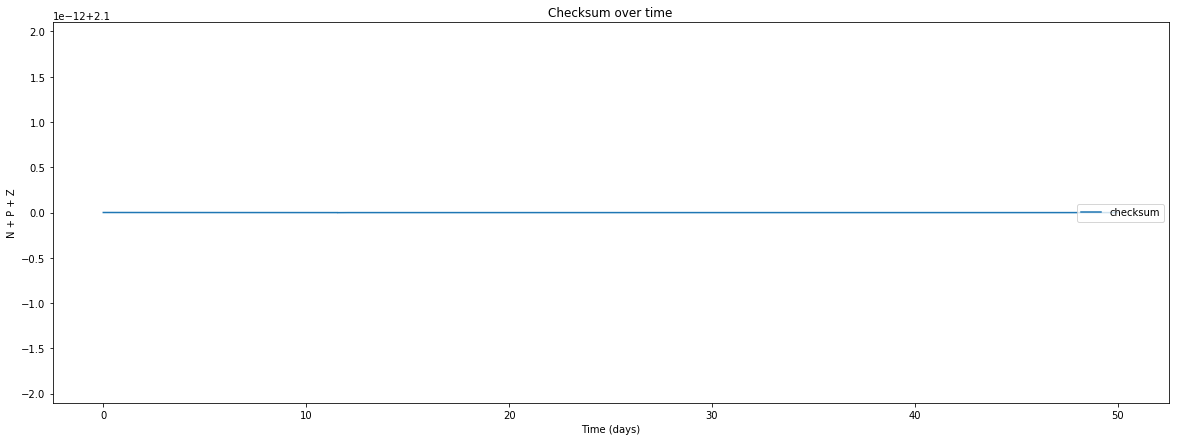

In [4]:
plt.subplots(figsize=(20, 7))
plt.plot(times, checksum, label='checksum')
plt.ylabel('N + P + Z')
plt.xlabel('Time (days)')
plt.title('Checksum over time')
plt.legend(loc='center right')
plt.show()

In [6]:
checksum = []
times = []

#solve using odeint
def npz(initial, t):
    nN = initial[0]   #Nutrients biomass           
    nP = initial[1]   #phytoplankton biomass
    nZ = initial[2]   #Zooplankton biomass

    v = 1.     #rate of nutrient update
    mZ = .5    #rate of Zooplankton mortality
    mP = .1    #rate of Phytoplankton mortality
    γ = .3     #Zooplankton growth efficiency

    k  = 1.    #1/2 saturation constant for Nutrient update
    Λ = 1.     #Ivlev grazing constant
    Rm = 1.5   #maximum zooplankton grazing rate
    T = .02    #turbulent mixing rate
    Ni = 1.6   #initial nutrient concentration

    zG = Rm*(1-math.exp(-Λ*nP))
    
    f = [
       ((-v*nN*nP)/(k+nN) + mP*nP + mZ*nZ + (1-γ)*nZ*zG - T*nN + T*Ni),
       ((v*nP*nN)/(k+nN) - mP*nP - nZ*zG) - T*nP,
       (γ*nZ*zG - mZ*nZ)
    ]
    
    checksum.append(nN + nP + nZ)
    times.append(t)
    
    return f
    
t = .25
tmax = 50.
steps = tmax/t

time = np.linspace(0, tmax, steps)
initial = [1.6, 0.4, 0.15]
pop = odeint(npz, initial, time, tfirst=True)
    
plt.subplots(figsize=(15, 10))
plt.plot(time, pop)

blue_patch = mp.Patch(color='blue', label='nutrients')
green_patch = mp.Patch(color='green', label='phytoplankton')
red_patch = mp.Patch(color='red', label='zooplankton')

plt.legend(handles=[blue_patch, green_patch, red_patch])
plt.show()

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:38: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


TypeError: 'float' object is not subscriptable